In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def avg_circles(circles, b):
    avg_x=0
    avg_y=0
    avg_r=0
    for i in range(b):
        #optional - average for multiple circles (can happen when a gauge is at a slight angle)
        avg_x = avg_x + circles[0][i][0]
        avg_y = avg_y + circles[0][i][1]
        avg_r = avg_r + circles[0][i][2]
    avg_x = int(avg_x/(b))
    avg_y = int(avg_y/(b))
    avg_r = int(avg_r/(b))   
    return avg_x, avg_y, avg_r

In [3]:
def hammingDistance(self, x, y):
    return bin(x^y).count('1')

In [4]:
#直线到点的距离
def distance(line,x,y):
    x1,y1,x2,y2=line
    
    array_longi  = np.array([x2-x1, y2-y1])
    array_trans = np.array([x2-x, y2-y])
    # 用向量计算点到直线距离
    array_temp = (float(array_trans.dot(array_longi)) / array_longi.dot(array_longi))   # 注意转成浮点数运算
    array_temp = array_longi.dot(array_temp)
    distance   = np.sqrt((array_trans - array_temp).dot(array_trans - array_temp))
    return distance

param1：double类型，有默认值100。它表示传递给canny边缘检测算子的高阈值，而低阈值为高阈值的一半。

param2：double类型，也有默认值100。它表示在检测阶段圆心的累加器阈值。它越小的话，就可以检测到更多根本不存在的圆，而它越大的话，能通过检测的圆就更加接近完美的圆形了。

minRadius：int类型,有默认值0，表示圆半径的最小值。

maxRadius：int类型,也有默认值0，表示圆半径的最大值。需要注意的是

使用此函数可以很容易地检测出圆的圆心，但是它可能找不到合适的圆半径


In [5]:
# 检测圆环 
#返回值：圆心的坐标和半径
def find_gauge(img):
    p2=160
    img_copy=img.copy()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = cv.equalizeHist(gray)   
    height, width = img_copy.shape[:2]   
    # circles得到的是检测到的所有圆的集合,circles.shape=(1, *, 3)，*为圆的个数，每个圆有三个特征    
    
    flag=1
    while(flag):
        circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, int(height*0.08), np.array([]), param1=200, param2=p2, minRadius=int(height*0.14), maxRadius=int(height*1))
        if(circles is None):
            p2=p2-2
        else:
            a, b, c = circles.shape
            for w in range(circles.shape[0]):
                
                x,y,r = circles[w][0]
                x=int(x)
                y=int(y)
                r=int(r)
    #             x,y,r = avg_circles(circles, b)
#                 print(' x,y,r',x,y,r)
                img_copy=cv.circle(img_copy, (x, y), r, (0, 255, 0), 3, cv.LINE_AA)  # draw circle
                img_copy=cv.circle(img_copy, (x, y), 2, (0, 255, 0), 5, cv.LINE_AA)  # draw center of circle
            flag=0
    return x,y,r,img_copy
    

分别画出检测到的每一个圆

In [6]:
#for i in range(circles.shape[1]):
#    temp = circles[0]
#    cv.circle(img, (temp[i][0], temp[i][1]), temp[i][2], (0, 0, 255), 3, cv.LINE_AA)  # draw circle
#    #cv.circle(img, (temp[i][0],temp[i][1] ), 2, (0, 255, 255), 3, cv.LINE_AA)  # draw center of circle   
#plt.imshow(img)
#plt.show()

将检测到的圆的三个特征求平均

x,y,r分别表示圆的位置和半径,原图上画出检测到的圆（求平均后）

制作蒙版将检测到的圆切割出来

In [7]:
def dist_2_pts(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)


# #该方法进行指针的检测
# #返回值为检测到的直线的列表
# def pointer_detection(img,x,y,r):
#     gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#     gray = cv.equalizeHist(gray) 
    
#     maxValue = 255
#     thresh = 50
#     flag=1
#     while(flag):
#         th, dst2 = cv.threshold(gray, thresh, maxValue, cv.THRESH_BINARY_INV);
# #         kernel = np.ones((3,3), np.uint8)
# #         dst2 = cv.erode(dst2, kernel)
# #         dst2 = cv.dilate(dst2, kernel)
        

#         minLineLength = 100
#         maxLineGap =10
#         lines = cv.HoughLinesP(dst2, 1.0, np.pi/180, 100, minLineLength, maxLineGap)
#         print('lines::::::::::::::::::::::',lines)
        
#         if(lines is None):
#             print('未检测到指针')
#             thresh=thresh+10
#         else:
#             cx=r
#             cy=r

#             final_line_list = []
#             diff1LowerBound = 0.2 
#             diff1UpperBound = 0.3
#             diff2LowerBound = 0.4 
#             diff2UpperBound = 0.8
#             for i in range(0, len(lines)):
#                 for x1, y1, x2, y2 in lines[i]:
#                     diff1 = dist_2_pts(cx, cy, x1, y1)  # x, y is center of circle
#                     diff2 = dist_2_pts(cx, cy, x2, y2)  # x, y is center of circle
#                     if (diff1 > diff2):
#                         temp = diff1
#                         diff1 = diff2
#                         diff2 = temp 
#                         if (((diff1<diff1UpperBound*r) and (diff1>diff1LowerBound*r) and (diff2<diff2UpperBound*r)) and (diff2>diff2LowerBound*r)):
#                             line_length = dist_2_pts(x1, y1, x2, y2)
#                             final_line_list.append([x1, y1, x2, y2]) 
#             if(len(final_line_list)==0):
#                 thresh=thresh+10
#             else:
#                 for i in range(len(final_line_list)):
#                     temp = final_line_list[i]
#                     x1 = temp[0]
#                     y1 = temp[1]
#                     x2 = temp[2]
#                     y2 = temp[3]
#                     cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 5)
# #                 line=np.mean(final_line_list, axis=0)
# #                 x1=int(line[0])
# #                 y1=int(line[1])
# #                 x2=int(line[2])
# #                 y2=int(line[3])

# #                 cv.line(img, (x1,y1),(x2,y2), (255, 0, 0), 5)
                
#                 x1 = final_line_list[0][0]
#                 y1 = final_line_list[0][1]
#                 x2 = final_line_list[0][2]
#                 y2 = final_line_list[0][3]
#                 cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
# #                 plt.imshow(img)
# #                 plt.show()
#                 flag=0
# #     plt.imshow(img)
# #     plt.show()
#     return dst2,final_line_list
    
    

In [8]:
# def eliminate_margin(img,r):
#     mask = np.zeros(img.shape[:2],dtype ="uint8")
#     cv.circle(mask, (r, r), r,255, -1)
#     masked = cv.bitwise_and(img, img, mask = mask)
    
    

In [9]:
#绘制刻度
def draw_calibration(img,x,y,r):
    separation = 10.0 #in degrees
    interval = int(360 / separation)
    p1 = np.zeros((interval,2))  #set empty arrays
    p2 = np.zeros((interval,2))
    p_text = np.zeros((interval,2))
    for i in range(0,interval):
        for j in range(0,2):
            if (j%2==0):
                p1[i][j] = x + 0.9 * r * np.cos(separation * i * 3.14 / 180) #point for lines
            else:
                p1[i][j] = y + 0.9 * r * np.sin(separation * i * 3.14 / 180)
    text_offset_x = 10
    text_offset_y = 5
    for i in range(0, interval):
        for j in range(0, 2):
            if (j % 2 == 0):
                p2[i][j] = x + r * np.cos(separation * i * 3.14 / 180)
                p_text[i][j] = x - text_offset_x + 1.2 * r * np.cos((separation) * (i+9) * 3.14 / 180) #point for text labels, i+9 rotates the labels by 90 degrees
            else:
                p2[i][j] = y + r * np.sin(separation * i * 3.14 / 180)
                p_text[i][j] = y + text_offset_y + 1.2* r * np.sin((separation) * (i+9) * 3.14 / 180)  # point for text labels, i+9 rotates the labels by 90 degrees

        #add the lines and labels to the image
    for i in range(0,interval):
        cv.line(img, (int(p1[i][0]), int(p1[i][1])), (int(p2[i][0]), int(p2[i][1])),(0, 255, 0), 3)
        cv.putText(img, '%s' %(int(i*separation)), (int(p_text[i][0]), int(p_text[i][1])), cv.FONT_HERSHEY_SIMPLEX,0.8,(0,255,0),2,cv.LINE_AA)  
    return img

In [10]:
#获取当前读数
def get_current_value(min_angle, max_angle, min_value, max_value, x, y, r , line):
    x1,y1,x2,y2=line
    _final_angle=0
    dist_pt_0 = dist_2_pts(x, y, x1, y1)
    dist_pt_1 = dist_2_pts(x, y, x2, y2)
    if (dist_pt_0 > dist_pt_1):
        x_angle = x1 - x
        y_angle = y - y1
    else:
        x_angle = x2 - x
        y_angle = y - y2
    res = np.arctan(np.divide(float(y_angle), float(x_angle)))
  
    res = np.rad2deg(res)
    if x_angle > 0 and y_angle > 0:  #in quadrant I
        _final_angle = 270 - res
    if x_angle < 0 and y_angle > 0:  #in quadrant II
        _final_angle = 90 - res
    if x_angle < 0 and y_angle < 0:  #in quadrant III
        _final_angle = 90 - res
    if x_angle > 0 and y_angle < 0:  #in quadrant IV
        _final_angle = 270 - res      
    
    print('指针的角度为',_final_angle)    
    old_min = float(min_angle)
    old_max = float(max_angle)

    new_min = float(min_value)
    new_max = float(max_value)

    old_value = _final_angle

    old_range = (old_max - old_min)
    new_range = (new_max - new_min)
    new_value = (((old_value - old_min) * new_range) / old_range) + new_min
    
    return new_value




In [11]:
def sift_kp(image):
    gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    sift = cv.xfeatures2d.SIFT_create()
    kp,des = sift.detectAndCompute(image,None)
    kp_image = cv.drawKeypoints(gray_image,kp,None)
    return kp_image,kp,des

def get_good_match(des1,des2):
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)
    return good

def siftImageAlignment(img1,img2):
    _,kp1,des1 = sift_kp(img1)
    _,kp2,des2 = sift_kp(img2)
    goodMatch = get_good_match(des1,des2)
    if len(goodMatch) > 4:
        ptsA= np.float32([kp1[m.queryIdx].pt for m in goodMatch]).reshape(-1, 1, 2)
        ptsB = np.float32([kp2[m.trainIdx].pt for m in goodMatch]).reshape(-1, 1, 2)
        ransacReprojThreshold = 4
        H, status =cv.findHomography(ptsA,ptsB,cv.RANSAC,ransacReprojThreshold);
        imgOut = cv.warpPerspective(img2, H, (img2.shape[1],img2.shape[0]),flags=cv.INTER_LINEAR + cv.WARP_INVERSE_MAP)
    return imgOut,H,status

In [12]:
def rectify(template,img):
    crop_size = (template.shape[0], template.shape[0])

    img = cv.resize(img, crop_size, interpolation = cv.INTER_CUBIC)
    print(template.shape)
    print(img.shape)
    
    result,_,_ = siftImageAlignment(template,img)
#     plt.imshow(result)
#     plt.show()
    return result

In [13]:
def brg2hsv(img,thresh):
    
    b,g,r = cv.split(img)#拆分通道
    img_1 = cv.merge([r,g,b])#合并通道
    img_hsv = cv.cvtColor(img_1,cv.COLOR_BGR2HSV)
    
    lower_blue=np.array([0,0,0])
    upper_blue=np.array([180,100,thresh])
    
    mask = cv.inRange(img_hsv, lower_blue, upper_blue)
    res = cv.bitwise_and(img_hsv, img_hsv, mask=mask)
    return res



In [14]:
def equalize(img):
    temp = np.transpose(img,(2,0,1))
    tempL = [temp[0], temp[1], temp[2]]
    tempL = list(map(lambda x:cv.equalizeHist(x),tempL))
#     def showimg(x):
#         plt.imshow(x,'gray')
#         plt.show()
#     list(map(showimg,temp))
    newImg = np.transpose(np.array(tempL),(1,2,0))
    print('equalize')
    
    plt.imshow(newImg)
    plt.show()
    return newImg

In [15]:
#该方法进行指针的检测
#返回值为检测到的直线的列表
def pointer_detection3(img,x,y,r):
    
    r=img.shape[0]/2
    
    ###################################################
    #将图像对比度增强，提取黑色的部分
    resultL=equalize(img)
    thresh=40
    flag=1
    while(flag):
        hsvImg= brg2hsv(resultL,thresh)
        plt.imshow(hsvImg)
        plt.show()
        
        hsvImg.astype(np.uint8)
        hsvImg = cv.cvtColor(hsvImg, cv.COLOR_BGR2GRAY)
#         plt.imshow(hsvImg,'gray')
#         plt.show()
        
        th, hsvImg = cv.threshold(hsvImg, 1, 255, cv.THRESH_BINARY)
        
#         plt.imshow(hsvImg,'gray')
#         plt.show()
        
        rr=int(r*0.6)
        mask2 = np.zeros(hsvImg.shape[:3],dtype ="uint8")
        mask2=mask2*255
        cv.circle(mask2,(int(r), int(r)), rr,255, -1)
#         plt.imshow(mask2,'gray')
#         plt.show()
    
        hsvImg = cv.bitwise_and(hsvImg, hsvImg, mask = mask2)
        
        
        
        kernel = np.ones((5,5), np.uint8)
        hsvImg = cv.dilate(hsvImg, kernel)
        hsvImg = cv.dilate(hsvImg, kernel)
        hsvImg = cv.erode(hsvImg, kernel)
        hsvImg = cv.dilate(hsvImg, kernel)
        hsvImg = cv.erode(hsvImg, kernel)
        hsvImg = cv.erode(hsvImg, kernel)
#         hsvImg = cv.dilate(hsvImg, kernel)
        
#         hsvImg=eliminate_margin(hsvImg,r)
        
#         hsvImg = cv.distanceTransform(hsvImg,cv.DIST_L2,3)   
    
#         hsvImg=hsvImg.astype(np.uint8)

#         hsvImg = cv.distanceTransform(hsvImg,cv.DIST_L2, 3)
#         hsvImg=np.array(hsvImg,np.uint8)
#         plt.imshow(hsvImg,'gray')
#         plt.show()
        
        
        
#         maxvalue=np.max(hsvImg)
#         th, hsvImg = cv.threshold(hsvImg,maxvalue*0.1,maxvalue,cv.THRESH_BINARY)
        
#         plt.imshow(hsvImg,'gray')
#         plt.show()
        
        
        
#         plt.hist(hsvImg.ravel(), 256, [0, 255])
#         plt.show()
        
    
        #寻找轮廓
#         blurred,contours,hierarchy=cv.findContours(hsvImg,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
#         maxarea=0
#         index=0
#         for i in range(len(contours)):
#             area=cv.contourArea(contours[i])
#             print(area)
#             if(area>maxarea):
#                 maxarea=area
#                 index=i
#         print(index)
            
        
        
        
#         cv.drawContours(img,contours[index],-1,(0,0,255),5)
#         plt.imshow(img)
#         plt.show()
        
#         M = cv.moments(contours[index])
#         print(M)
#         cX = int(M["m10"] / M["m00"])
#         cY = int(M["m01"] / M["m00"])
        
#         cv.circle(img, (cX, cY), 2, (255, 255, 255), -1)
#         print('中心点为：',(cX,cY))
#         plt.imshow(img)
#         plt.show()
#         cv.RETR_TREE
#         binary,contour,hierarchy=cv.findContours(hsvImg,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
#         maxarea=0
#         index=0
#         for i in range(len(contour)):
#             coo=cv.contourArea(contour[i])
#             if(coo>maxarea):
#                 maxarea=coo
#                 index=i
#         print(maxarea)
#         print(index)
    
#         cv.drawContours(img,contour[index],-1,(0,0,255),5)
#         th, hsvImg = cv.threshold(hsvImg, 15, 255, cv.THRESH_BINARY)
        
#         print(hsvImg.shape)
        
#         print('hsvImg')
#         plt.imshow(hsvImg,'gray')
#         plt.show()
        
        
        minLineLength = 100
        maxLineGap =10
        lines = cv.HoughLinesP(hsvImg, 1.0, np.pi/180, 80, minLineLength, maxLineGap)
        if(thresh<200):
            if(lines is None):
                print('未检测到指针',thresh)
                thresh=thresh+10
                continue
            else:
                cx=r
                cy=r
                final_line_list = []
                line_list = []
                #第一次过滤
                for i in range(0, len(lines)):
                    if(distance(lines[i][0],x,y)<20):
                        line_list.append(lines[i][0]) 


                #第二次过滤
                diff1LowerBound = 0
                diff1UpperBound = 0.9
                diff2LowerBound = 0 
                diff2UpperBound = 0.9
                for i in range(0, len(line_list)):
                    x1, y1, x2, y2=line_list[i]
                    diff1 = dist_2_pts(cx, cy, x1, y1)  # x, y is center of circle
                    diff2 = dist_2_pts(cx, cy, x2, y2)  # x, y is center of circle
                    if (diff1 > diff2):
                        temp = diff1
                        diff1 = diff2
                        diff2 = temp 
                        if (((diff1<diff1UpperBound*r) and (diff1>diff1LowerBound*r) and (diff2<diff2UpperBound*r)) and (diff2>diff2LowerBound*r)):
                            line_length = dist_2_pts(x1, y1, x2, y2)
                            final_line_list.append([x1, y1, x2, y2]) 
           
                if(thresh<200):
                    if(len(final_line_list)==0 ):
                        thresh=thresh+10
                        print('无指针',thresh)
                        continue
                    else:
                        for i in range(len(final_line_list)):
                            temp = final_line_list[i]
                            x1 = temp[0]
                            y1 = temp[1]
                            x2 = temp[2]
                            y2 = temp[3]
                            cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 5)
                        x1 = final_line_list[0][0]
                        y1 = final_line_list[0][1]
                        x2 = final_line_list[0][2]
                        y2 = final_line_list[0][3]
                        cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                        plt.imshow(img)
                        plt.show()
                        flag=0
        for i in range(len(lines)):
            temp = lines[i][0]
            x1 = temp[0]
            y1 = temp[1]
            x2 = temp[2]
            y2 = temp[3]
            cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
#         x1 = lines[0]
#         y1 = lines[1]
#         x2 = lines[2]
#         y2 = lines[3]
#         cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        plt.imshow(img)
        plt.show()
        flag=0
    return hsvImg,final_line_list
    

In [16]:



# 



In [17]:
#该方法将原图像处理裁剪
#返回裁剪后的图像

def calibrate_gauge(img,x,y,r):
    mask = np.zeros(img.shape[:2],dtype ="uint8")
    cv.circle(mask, (x, y), r,255, -1)
    
    masked = cv.bitwise_and(img, img, mask = mask)
    
#     mask2 = np.ones(img.shape[:3],dtype ="uint8")
#     mask2=mask2*255
#     cv.circle(mask2, (x, y), r,0, -1)
#     plt.imshow(mask2,'gray')
#     plt.show()
    
#     masked2 = cv.add(masked, mask2)
    
    dstImg = masked[y-r:y+r,x-r:x+r]
    
    
    

    
    
    print('裁剪后的图像：')
    plt.imshow(dstImg,'gray')
    plt.show()
    return dstImg 

第 27 张图 


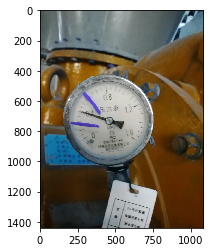

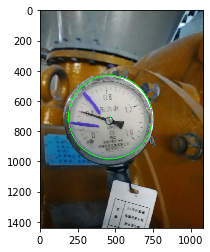

裁剪后的图像：


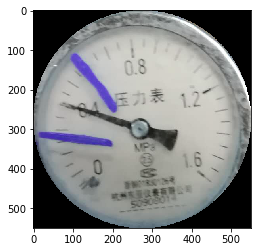

(443, 467, 3)
(443, 443, 3)
equalize


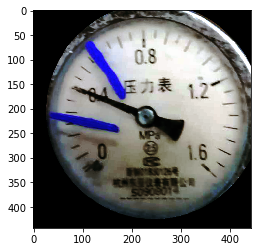

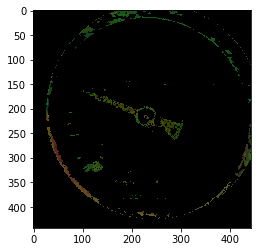

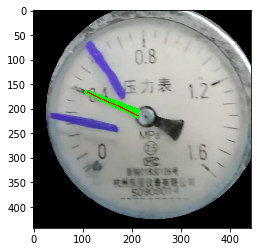

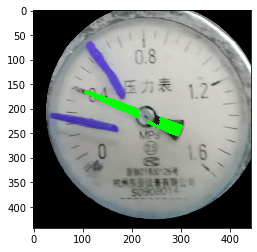

指针的角度为 110.16260399078604
最终的读数为 0.36324591088776476


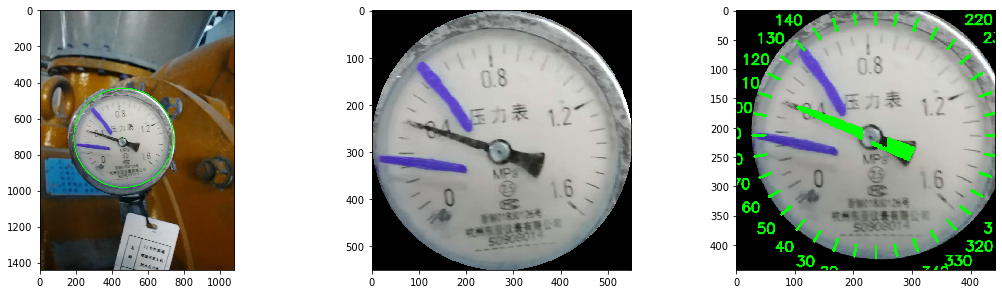

第 28 张图 


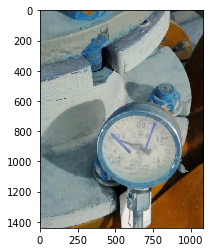

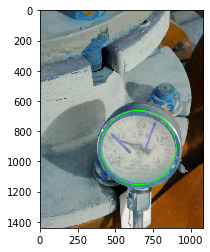

裁剪后的图像：


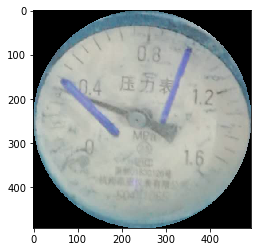

(443, 467, 3)
(443, 443, 3)
equalize


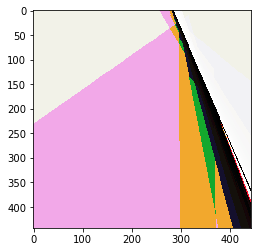

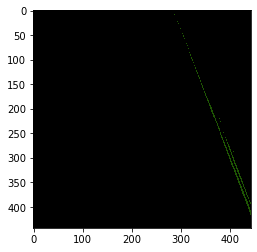

未检测到指针 40


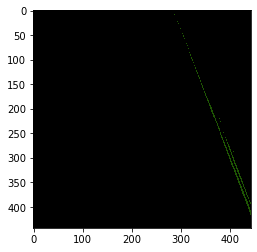

未检测到指针 50


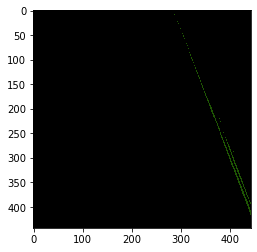

未检测到指针 60


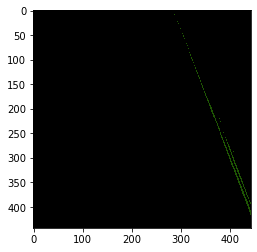

未检测到指针 70


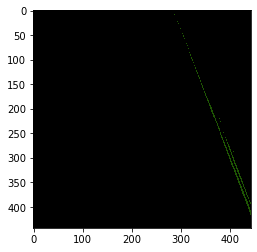

未检测到指针 80


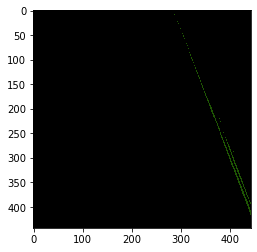

未检测到指针 90


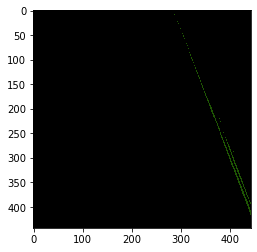

未检测到指针 100


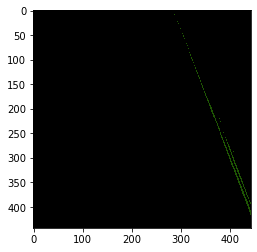

未检测到指针 110


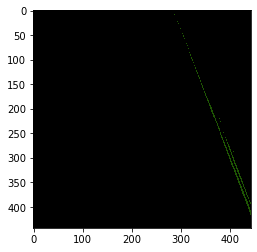

未检测到指针 120


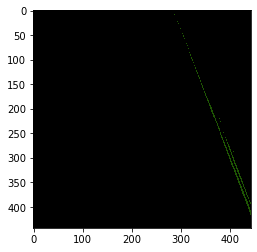

未检测到指针 130


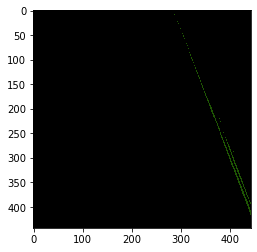

未检测到指针 140


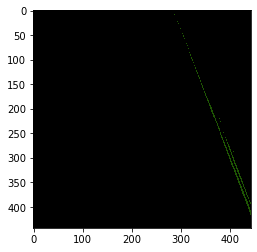

未检测到指针 150


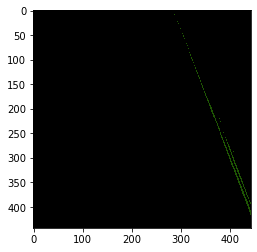

未检测到指针 160


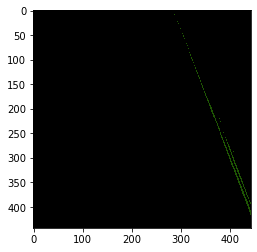

未检测到指针 170


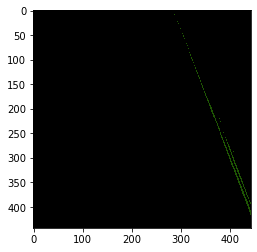

未检测到指针 180


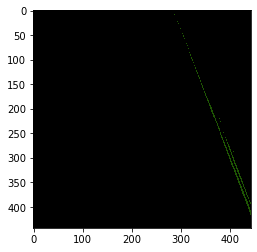

未检测到指针 190


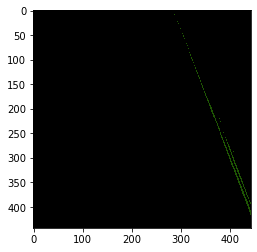

TypeError: object of type 'NoneType' has no len()

In [18]:
#读取模板图片template
template=cv.imread('./gauge_imgs/circle_clear/type2/circle-type2-template.jpg')
#记录模板图片的圆心位置和半径
ix,iy,ir,template_find=find_gauge(template)



for i in range(27,29):
    #1.读取待读数图片
    IMAGEPATH = './gauge_imgs/circle_clear/type2/circle-type2-%s.jpg'
    img = cv.imread(IMAGEPATH % i)   
    print('第 %s 张图 '% i)
    plt.imshow(img)
    plt.show()

#     #2.定位表盘位置

    x,y,r,img_find=find_gauge(img)
    plt.imshow(img_find)
    plt.show()
    
    if(x!=0):
        #3.裁剪图象
        dstImg=calibrate_gauge(img,x,y,r)
         
        #4.图像校正
        result=rectify(template,dstImg)
        res=result.copy()
        
        
        
        #5.检测指针
        dst2,final_line_list=pointer_detection3(result,ix,iy,ir)
        
         #6.绘制刻度线
        calib=draw_calibration(result,ix,iy,ir)
        
        
        if(len(final_line_list)==0):
            print('该图像无法检测到指针')
        else:
            new_value=get_current_value(50,315, 0,1.6, ix,iy,ir , final_line_list[0])
            print('最终的读数为',new_value)
        
        fig=plt.figure()
        fig.set_size_inches(18.5, 10.5)
        plt.subplot(2,3,1)
        plt.imshow(img_find)
        plt.subplot(2,3,2)
        plt.imshow(dstImg)
        plt.subplot(2,3,3)
        plt.imshow(result)
       

        
            
#             7.绘制图片
            
#         fig.set_size_inches(18.5, 10.5)
#         plt.subplot(2,3,4)
#         plt.imshow(dst2,'gray')
        
#         plt.subplot(2,3,5)
#         plt.imshow(calib)
#         dst3 = cv.distanceTransform(dst2,cv.DIST_L2, 3)
#         plt.subplot(2,3,6)
#         plt.imshow(dst3,'gray')
            
            
        plt.show()

            



        

In [ ]:
#读取模板图片template
template=cv.imread('./gauge_imgs/circle_clear/type5/circle-type5-template.jpg')
#记录模板图片的圆心位置和半径
ix,iy,ir,template_find=find_gauge(template)



for i in range(8,9):
    #1.读取待读数图片
    IMAGEPATH = './gauge_imgs/circle_clear/type5/circle-type5-%s.jpg'
    img = cv.imread(IMAGEPATH % i)   
    print('第 %s 张图 '% i)
    plt.imshow(img)
    plt.show()

#     #2.定位表盘位置

    x,y,r,img_find=find_gauge(img)
    plt.imshow(img_find)
    plt.show()
    
    if(x!=0):
        #3.裁剪图象
        dstImg=calibrate_gauge(img,x,y,r)
         
        #4.图像校正
        result=rectify(template,dstImg)
        res=result.copy()
        
        
        
        #5.检测指针
        dst2,final_line_list=pointer_detection3(result,ix,iy,ir)
        
         #6.绘制刻度线
        calib=draw_calibration(result,ix,iy,ir)
        
        
        if(len(final_line_list)==0):
            print('该图像无法检测到指针')
        else:
            new_value=get_current_value(50,310, 0,1.6, ix,iy,ir , final_line_list[0])
            print('最终的读数为',new_value)
        
        fig=plt.figure()
        fig.set_size_inches(18.5, 10.5)
        plt.subplot(2,3,1)
        plt.imshow(img_find)
        plt.subplot(2,3,2)
        plt.imshow(dstImg)
        plt.subplot(2,3,3)
        plt.imshow(result)
       

        
            
#             7.绘制图片
            
#         fig.set_size_inches(18.5, 10.5)
#         plt.subplot(2,3,4)
#         plt.imshow(dst2,'gray')
        
#         plt.subplot(2,3,5)
#         plt.imshow(calib)
#         dst3 = cv.distanceTransform(dst2,cv.DIST_L2, 3)
#         plt.subplot(2,3,6)
#         plt.imshow(dst3,'gray')
            
            
        plt.show()

            



        

In [ ]:
#读取模板图片template
template=cv.imread('./gauge_imgs/circle_clear/type4/circle-type4-template.jpg')
#记录模板图片的圆心位置和半径
ix,iy,ir,template_find=find_gauge(template)



for i in range(12,13):
    #1.读取待读数图片
    IMAGEPATH = './gauge_imgs/circle_clear/type4/circle-type4-%s.jpg'
    img = cv.imread(IMAGEPATH % i)   
    print('第 %s 张图 '% i)
    plt.imshow(img)
    plt.show()

#     #2.定位表盘位置

    x,y,r,img_find=find_gauge(img)
    plt.imshow(img_find)
    plt.show()
    
    if(x!=0):
        #3.裁剪图象
        dstImg=calibrate_gauge(img,x,y,r)
         
        #4.图像校正
        result=rectify(template,dstImg)
        res=result.copy()

        
        #5.检测指针
        dst2,final_line_list=pointer_detection3(result,ix,iy,ir)
        
         #6.绘制刻度线
        calib=draw_calibration(result,ix,iy,ir)
        
        
        if(len(final_line_list)==0):
            print('该图像无法检测到指针')
        else:
            new_value=get_current_value(50,310, 0,1.6, ix,iy,ir , final_line_list[0])
            print('最终的读数为',new_value)
        
        fig=plt.figure()
        fig.set_size_inches(18.5, 10.5)
        plt.subplot(2,3,1)
        plt.imshow(img_find)
        plt.subplot(2,3,2)
        plt.imshow(dstImg)
        plt.subplot(2,3,3)
        plt.imshow(result)
       
            
        plt.show()

            



        

In [ ]:
#读取模板图片template
template=cv.imread('./gauge_imgs/circle_clear/type6/circle-type6-template.jpg')
#记录模板图片的圆心位置和半径
ix,iy,ir,template_find=find_gauge(template)



for i in range(5,6):
    #1.读取待读数图片
    IMAGEPATH = './gauge_imgs/circle_clear/type6/circle-type6-%s.jpg'
    img = cv.imread(IMAGEPATH % i)   
    print('第 %s 张图 '% i)
    plt.imshow(img)
    plt.show()

#     #2.定位表盘位置

    x,y,r,img_find=find_gauge(img)
    plt.imshow(img_find)
    plt.show()
    
    if(x!=0):
        #3.裁剪图象
        dstImg=calibrate_gauge(img,x,y,r)
         
        #4.图像校正
        result=rectify(template,dstImg)
        res=result.copy()

        
        #5.检测指针
        dst2,final_line_list=pointer_detection3(result,ix,iy,ir)
        
         #6.绘制刻度线
        calib=draw_calibration(result,ix,iy,ir)
        
        
        if(len(final_line_list)==0):
            print('该图像无法检测到指针')
        else:
            new_value=get_current_value(50,310, 0,1.6, ix,iy,ir , final_line_list[0])
            print('最终的读数为',new_value)
        
        fig=plt.figure()
        fig.set_size_inches(18.5, 10.5)
        plt.subplot(2,3,1)
        plt.imshow(img_find)
        plt.subplot(2,3,2)
        plt.imshow(dstImg)
        plt.subplot(2,3,3)
        plt.imshow(result)
       
            
        plt.show()